In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

# import from data_utils
from data_utils import load_data, column_summary

In [3]:
# Load data 
file_path = r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\Data\train.csv' 
df = load_data(file_path) 

c:\Users\Maintenant prêt\Desktop\PROJECTS\Project5\scripts\data_utils.py:20: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, **kwargs)


In [4]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
# Call column_summary function
summary_df = column_summary(df) 
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values
0,Store,int64,0,1017209,1115
1,DayOfWeek,int64,0,1017209,7
2,Date,object,0,1017209,942
3,Sales,int64,0,1017209,21734
4,Customers,int64,0,1017209,4086
5,Open,int64,0,1017209,2
6,Promo,int64,0,1017209,2
7,StateHoliday,object,0,1017209,5
8,SchoolHoliday,int64,0,1017209,2


In [8]:
# Define a dictionary to map old column names to new column names
new_column_names = {
    'Store': 'store_id',
    'DayOfWeek': 'day_of_week',
    'Date': 'date',
    'Sales': 'sales',
    'Customers': 'customers',
    'Open': 'store_open', 
    'Promo': 'promotion',
    'StateHoliday': 'state_holiday',
    'SchoolHoliday': 'school_holiday'
}

# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)


In [9]:
df

,store_id,day_of_week,date,sales,customers,store_open,promotion,state_holiday,school_holiday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Checking for summary statistics and duplicates
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())
print(df.describe())
print(df.duplicated().sum())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1          5  2015-07-31   5263        555     1      1            0              1
1      2          5  2015-07-31   6064        625     1      1            0              1
2      3          5  2015-07-31   8314        821     1      1            0              1
3      4          5  2015-07-31  13995       1498     1      1            0              1
4      5          5  2015-07-31   4822        559     1      1            0              1
              Store     DayOfWeek         Sales     Customers          Open         Promo  SchoolHoliday
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   1.017209e+06
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01  3.815145e-01   1.786467e-01
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01  4.857586e-01   3.830564e-01
min    1.000000e+00  1.000000e+00 

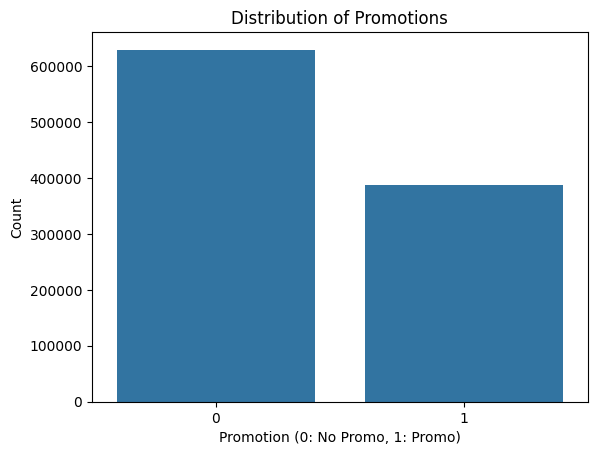

In [12]:
# Create the countplot for 'promotion'
sns.countplot(x='promotion', data=df)

# Customize the plot
plt.title('Distribution of Promotions')
plt.xlabel('Promotion (0: No Promo, 1: Promo)')
plt.ylabel('Count')

# Show the plot
plt.show()

In [13]:
df.columns

Index(['store_id', 'day_of_week', 'date', 'sales', 'customers', 'store_open', 'promotion', 'state_holiday', 'school_holiday'], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   store_id        1017209 non-null  int64 
 1   day_of_week     1017209 non-null  int64 
 2   date            1017209 non-null  object
 3   sales           1017209 non-null  int64 
 4   customers       1017209 non-null  int64 
 5   store_open      1017209 non-null  int64 
 6   promotion       1017209 non-null  int64 
 7   state_holiday   1017209 non-null  object
 8   school_holiday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


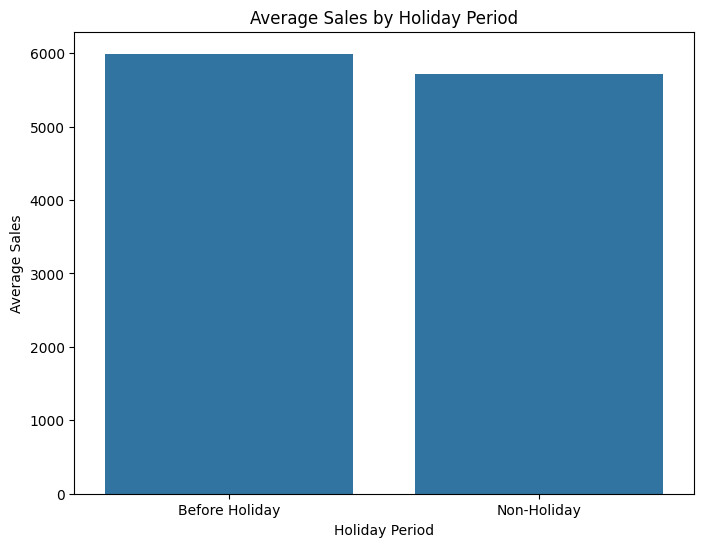

In [16]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Define a function to categorize days based on holiday status
def categorize_days(row):
    if row['holiday'] == 'Holiday':
        if row['date'] < pd.to_datetime(row['date']).date() + pd.DateOffset(days=3):  # Days before holiday
            return 'Before Holiday'
        elif row['date'] == pd.to_datetime(row['date']).date():  # Holiday day
            return 'Holiday'
        else:
            return 'After Holiday'
    else:
        return 'Non-Holiday'

# Apply the function to create a new column 'holiday_period'
df['holiday_period'] = df.apply(categorize_days, axis=1)

# Calculate average sales for each holiday period
avg_sales_by_period = df.groupby('holiday_period')['sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_period.index, y=avg_sales_by_period.values)
plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

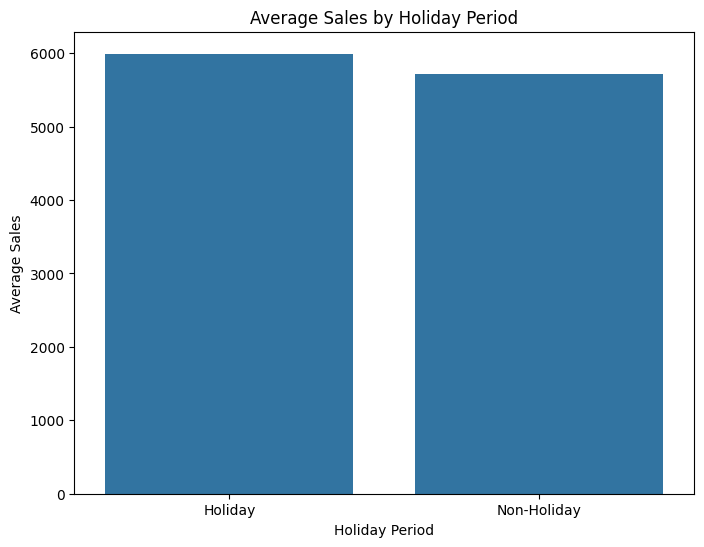

In [17]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Create a DataFrame for plotting
data = {'Holiday Period': ['Holiday', 'Non-Holiday'], 'Average Sales': [avg_sales_holiday, avg_sales_non_holiday]}
plot_df = pd.DataFrame(data)

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday Period', y='Average Sales', data=plot_df)
plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

In [18]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Print the average sales
print(f"Average Sales during Holidays: {avg_sales_holiday:.2f}")
print(f"Average Sales on Non-Holiday Days: {avg_sales_non_holiday:.2f}")

Average Sales during Holidays: 5992.80
Average Sales on Non-Holiday Days: 5721.14


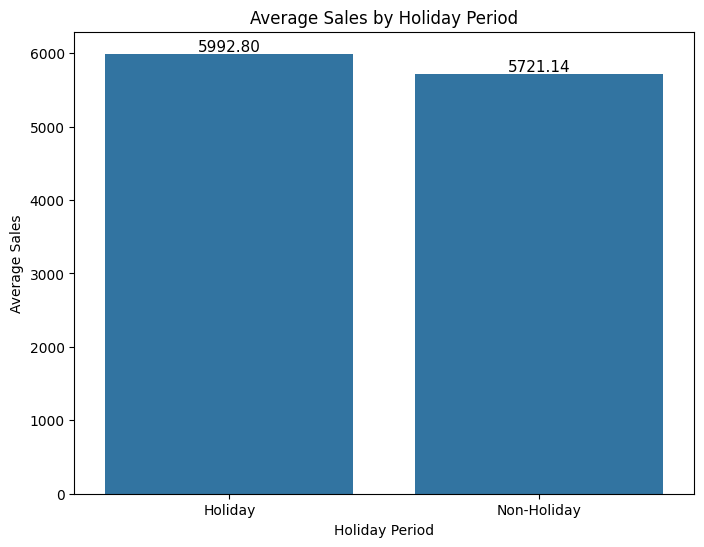

In [19]:
# Create a new column 'holiday' combining StateHoliday and SchoolHoliday
df['holiday'] = df['state_holiday'].astype(str) + df['school_holiday'].astype(str)
df['holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x != '00' else 'No Holiday')

# Calculate average sales during holidays
avg_sales_holiday = df[df['holiday'] == 'Holiday']['sales'].mean()

# Calculate average sales on non-holiday days
avg_sales_non_holiday = df[df['holiday'] == 'No Holiday']['sales'].mean()

# Create a DataFrame for plotting
data = {'Holiday Period': ['Holiday', 'Non-Holiday'], 'Average Sales': [avg_sales_holiday, avg_sales_non_holiday]}
plot_df = pd.DataFrame(data)

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Holiday Period', y='Average Sales', data=plot_df)

# Annotate the bars with the average sales values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Average Sales by Holiday Period')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

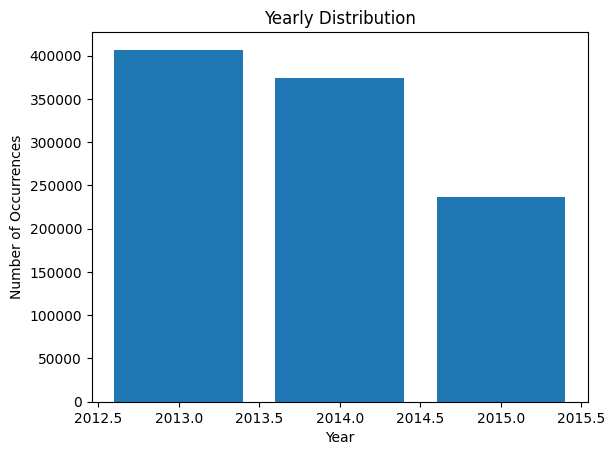

In [21]:
# Extract year
df['Year'] = df['date'].dt.year

# Plot yearly distribution
plt.bar(df['Year'].value_counts().index, df['Year'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Yearly Distribution')
plt.show()

In [23]:
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['Date'])

# Define a function to identify holiday seasons
def is_holiday_season(date):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date: Date object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season, 
             'Non-Holiday Season' otherwise.
    """
    year = date.year
    # Christmas (December 20th - December 31st)
    if (date.month == 12) and (date.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4) % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

SyntaxError: unmatched ')' (1091867338.py, line 29)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
#df['date'] = pd.to_datetime(df['date'])

# Define a function to identify holiday seasons
def is_holiday_season(date):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date: Date object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season, 
             'Non-Holiday Season' otherwise.
    """
    year = date.year
    # Christmas (December 20th - December 31st)
    if (date.month == 12) and (date.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4 % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

TypeError: 'Timestamp' object is not callable

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

# Assuming your DataFrame is named 'df'

# Convert 'Date' column to datetime format
#df['date'] = pd.to_datetime(df['Date'])

# Define a function to identify holiday seasons
def is_holiday_season(date_obj):
    """
    Checks if the given date falls within a major holiday season.

    Args:
        date_obj: DateTime object

    Returns:
        str: 'Holiday Season' if the date falls within a holiday season,
             'Non-Holiday Season' otherwise.
    """
    year = date_obj.year
    # Christmas (December 20th - December 31st)
    if (date_obj.month == 12) and (date_obj.day >= 20):
        return 'Christmas'

    # Easter (dynamic calculation)
    # Calculate Easter Sunday using the Meeus/Jones/Butcher algorithm
    a = year // 19
    b = year % 19
    c = (a - (a // 4) - ((a - (a + 1) // 4) + 2 * b + 4 * b // 5 + 5) // 3) + 19 * a // 4 % 30
    d = (c + 1) // 29
    e = (2 * d + a // 11) // 1
    f = (c - d + e + 2 * b + 4 * b // 5 + 5) // 3
    g = (f + 1) // 7
    h = (c - d + e + 2 * b + 4 * b // 5 - f + g) // 31
    i = (h + 10) // 11
    j = (c - d + e + 2 * b + 4 * b // 5 - f + g + 7 * i + 114) // 31
    month = 3 + (j + i - 9) // 12
    day = 28 + (j + i - 9) % 12
    easter_sunday = date(year, month, day)

    # Define Easter season (e.g., one week before and after Easter Sunday)
    easter_start = easter_sunday - timedelta(days=7)
    easter_end = easter_sunday + timedelta(days=7)
    if easter_start <= date_obj <= easter_end:
        return 'Easter'

    return 'Non-Holiday Season'

# Apply the function to create a new column
df['Season'] = df['date'].apply(is_holiday_season)

# Calculate average sales for each season
avg_sales_by_season = df.groupby('Season')['Sales'].mean()

# Create a bar plot to compare average sales
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values)
plt.title('Average Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

ValueError: day is out of range for month